In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
import pandas as pd

In [5]:
np.random.seed(42)

In [25]:
apartments=[f"Apt_{i}"for i in range(1,21)]

In [26]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [27]:
date=pd.DataFrame({
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
})

In [28]:
df =pd.DataFrame(date)

In [29]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,20.626123
1,2025-07-02,Apt_1,17.852972
2,2025-07-03,Apt_1,20.611488
3,2025-07-04,Apt_1,22.716490
4,2025-07-05,Apt_1,20.244300
...,...,...,...
595,2025-07-26,Apt_20,16.240153
596,2025-07-27,Apt_20,18.404730
597,2025-07-28,Apt_20,16.019871
598,2025-07-29,Apt_20,25.380036


In [30]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [31]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,20.63
1,2025-07-02,Apt_1,17.85
2,2025-07-03,Apt_1,20.61
3,2025-07-04,Apt_1,22.72
4,2025-07-05,Apt_1,20.24
...,...,...,...
595,2025-07-26,Apt_20,16.24
596,2025-07-27,Apt_20,18.40
597,2025-07-28,Apt_20,16.02
598,2025-07-29,Apt_20,25.38


In [32]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [33]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          20.336233
min    2025-07-01 00:00:00           5.390000
25%    2025-07-08 00:00:00          16.947500
50%    2025-07-15 12:00:00          20.210000
75%    2025-07-23 00:00:00          23.560000
max    2025-07-30 00:00:00          35.970000
std                    NaN           4.953919


In [34]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [35]:
#Total usage per apartments 
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartment
Apt_15    645.67
Apt_8     645.50
Apt_10    643.77
Apt_9     637.22
Apt_19    632.46
Apt_7     630.21
Apt_4     623.98
Apt_16    623.58
Apt_17    622.54
Apt_11    620.02
Apt_18    614.47
Apt_1     612.33
Apt_2     597.50
Apt_14    591.52
Apt_5     590.71
Apt_3     588.41
Apt_12    580.01
Apt_13    570.64
Apt_6     567.89
Apt_20    563.31
Name: Electricity_usage, dtype: float64


In [36]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg)

Date
2025-07-01    21.3085
2025-07-02    18.6025
2025-07-03    19.6760
2025-07-04    21.9270
2025-07-05    18.8155
2025-07-06    18.5710
2025-07-07    20.7145
2025-07-08    21.7820
2025-07-09    18.7780
2025-07-10    21.0035
2025-07-11    20.1440
2025-07-12    21.2055
2025-07-13    19.5590
2025-07-14    18.7410
2025-07-15    20.3940
2025-07-16    19.5080
2025-07-17    19.0480
2025-07-18    19.7930
2025-07-19    21.4085
2025-07-20    21.8030
2025-07-21    19.6290
2025-07-22    22.0545
2025-07-23    19.9740
2025-07-24    19.7375
2025-07-25    21.4650
2025-07-26    19.6095
2025-07-27    20.8555
2025-07-28    22.2870
2025-07-29    20.1305
2025-07-30    21.5620
Name: Electricity_usage, dtype: float64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

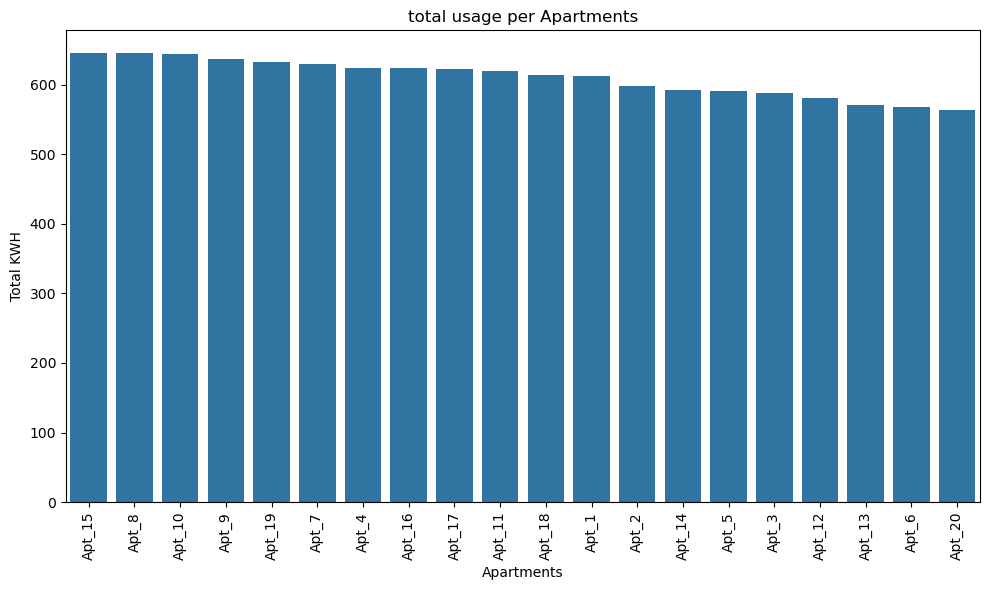

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index,y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("total usage per Apartments")
plt.xlabel("Apartments")
plt.ylabel("Total KWH")
plt.tight_layout() 
plt.show()

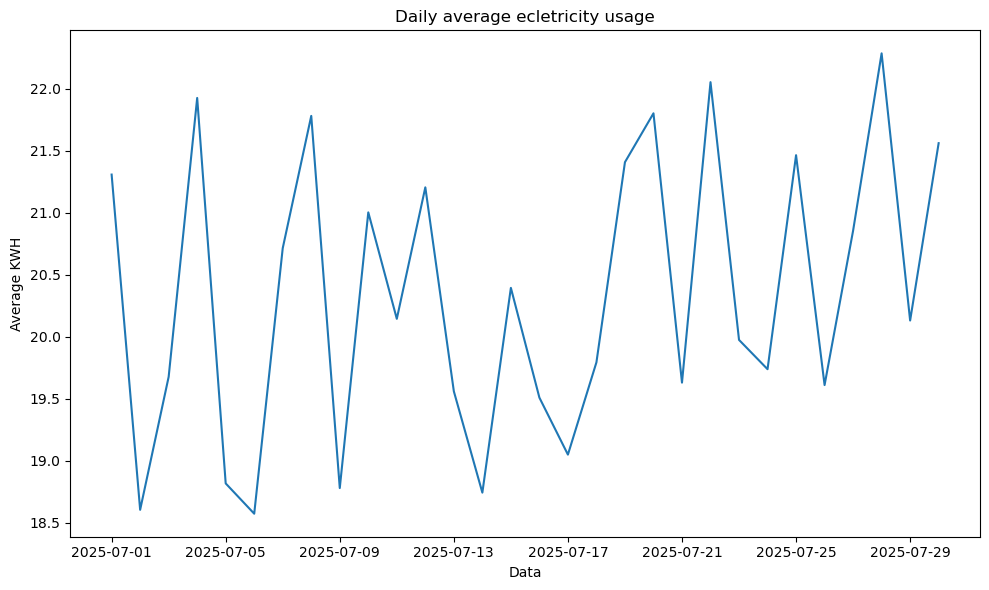

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average ecletricity usage")
plt.xlabel("Data")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

In [40]:
threshold=df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]==True].head())

         Date Apartment  Electricity_usage  High_usage_flag
19 2025-07-20     Apt_1              30.73             True
29 2025-07-30     Apt_1              31.05             True
33 2025-07-04     Apt_2              32.90             True
76 2025-07-17     Apt_3              31.60             True
91 2025-07-02     Apt_4              32.46             True
